<a href="https://colab.research.google.com/github/WilfriKusnadi/superduperimageanalysis/blob/main/analyze_drops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python numpy matplotlib scipy


Saving temp-4.PNG to temp-4 (1).PNG
Image dimensions: 7759 x 5284
Total contours detected: 387
Scored contours: 385
Top 10 scores: [70.1, 53.3, 53.1, 53.0, 52.9, 52.5, 52.5, 52.5, 52.4, 52.3]
Bottom 10 scores: [46.7, 46.7, 46.6, 46.5, 46.4, 46.3, 45.7, 45.5, 45.2, 44.7]
Final drops after proximity filtering: 385
Fixing grid labels for 385 drops...
Found 16 distinct rows
Row A: 24 drops, Y≈566.1
Row B: 24 drops, Y≈855.5
Row C: 24 drops, Y≈1140.6
Row D: 24 drops, Y≈1421.0
Row E: 24 drops, Y≈1704.8
Row F: 24 drops, Y≈1989.4
Row G: 24 drops, Y≈2271.5
Row H: 24 drops, Y≈2553.2
Row I: 24 drops, Y≈2835.6
Row J: 24 drops, Y≈3116.4
Row K: 24 drops, Y≈3399.6
Row L: 24 drops, Y≈3683.9
Row M: 24 drops, Y≈3967.3
Row N: 24 drops, Y≈4252.0
Row O: 24 drops, Y≈4537.0
Row P: 24 drops, Y≈4823.1
Successfully labeled 384 drops

Detected 384 drops using color-enhanced detection

Drop Analysis Results:


,Drop ID,Area (px²),Perimeter (px),Circularity,Diameter (px),Score,X (px),Y (px)
0,A1,21267.5,577.8,0.800,164.6,51.6,586.9,526.0
1,A2,20038.5,580.9,0.746,159.7,49.4,858.8,530.8
2,A3,20322.5,568.5,0.790,160.9,51.4,1149.5,536.5
3,A4,22633.5,600.9,0.788,169.8,51.7,1440.9,539.3
4,A5,21931.5,590.5,0.790,167.1,51.2,1720.7,544.0
...,...,...,...,...,...,...,...,...
379,P20,8831.0,378.5,0.774,106.0,50.2,5931.6,4826.0
380,P21,7874.5,355.3,0.784,100.1,51.1,6210.0,4831.5
381,P22,8225.0,371.2,0.750,102.3,49.0,6484.5,4832.3
382,P23,8718.0,379.7,0.760,105.4,49.6,6768.3,4833.0


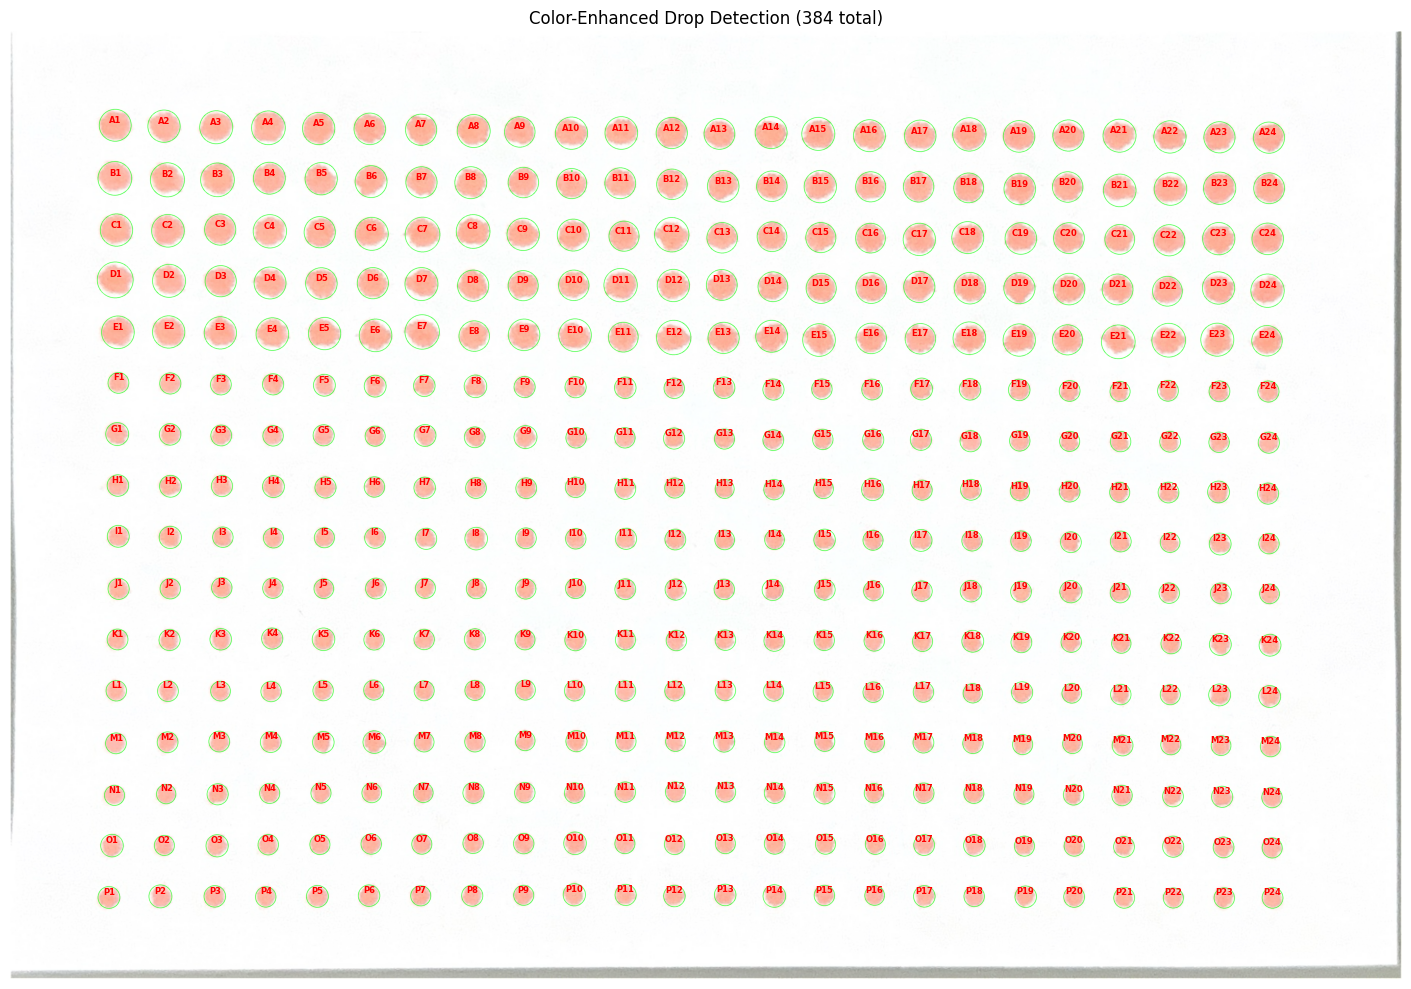

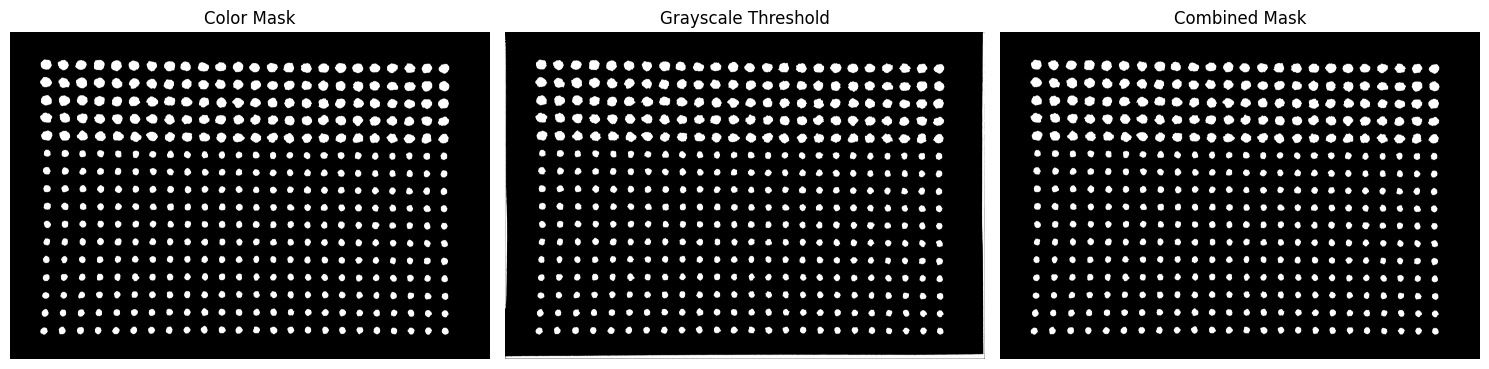

Creating row-wise Coefficient of Variation analysis...
Grid dimensions: 16 rows x 24 columns

--- Processing Row A independently ---
Row A has 24 drops
Row A: Mean=19995.5, CV=5.8%
Row A CV contributions: 0.2% to 13.2%

--- Processing Row B independently ---
Row B has 24 drops
Row B: Mean=19603.3, CV=6.4%
Row B CV contributions: 0.3% to 15.3%

--- Processing Row C independently ---
Row C has 24 drops
Row C: Mean=19587.1, CV=5.7%
Row C CV contributions: 1.0% to 12.9%

--- Processing Row D independently ---
Row D has 24 drops
Row D: Mean=19026.8, CV=4.7%
Row D CV contributions: 0.3% to 14.6%

--- Processing Row E independently ---
Row E has 24 drops
Row E: Mean=18797.6, CV=4.3%
Row E CV contributions: 0.2% to 10.1%

--- Processing Row F independently ---
Row F has 24 drops
Row F: Mean=8933.4, CV=4.6%
Row F CV contributions: 0.8% to 9.2%

--- Processing Row G independently ---
Row G has 24 drops
Row G: Mean=8793.4, CV=6.0%
Row G CV contributions: 0.0% to 20.5%

--- Processing Row H indepe

Row/Col,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
A,6.4%,0.2%,1.6%,13.2%,9.7%,2.7%,3.7%,10.0%,5.6%,3.0%,4.8%,3.0%,7.9%,3.3%,1.8%,0.3%,1.6%,5.9%,1.0%,8.9%,4.0%,4.2%,3.9%,5.0%
B,9.8%,5.4%,15.3%,8.6%,3.5%,0.9%,2.7%,0.4%,4.5%,6.0%,5.7%,4.9%,0.3%,8.4%,2.1%,8.7%,2.1%,2.2%,3.2%,5.0%,7.7%,1.0%,11.1%,1.2%
C,5.8%,11.4%,6.6%,2.5%,1.0%,3.2%,8.6%,3.2%,1.1%,3.2%,1.2%,2.2%,7.3%,6.5%,4.6%,5.4%,3.6%,2.2%,2.9%,2.4%,12.9%,5.7%,3.9%,5.7%
D,14.6%,1.7%,4.2%,1.5%,3.8%,2.0%,2.6%,0.3%,5.5%,5.7%,3.9%,0.6%,3.3%,6.9%,1.8%,2.3%,2.4%,1.6%,0.4%,2.0%,4.7%,7.3%,1.3%,3.0%
E,10.1%,6.9%,0.3%,1.8%,2.5%,6.1%,4.2%,6.8%,0.5%,1.1%,3.4%,1.0%,1.6%,1.9%,0.2%,8.5%,2.7%,3.7%,0.5%,2.9%,3.6%,0.4%,1.5%,5.1%
F,1.0%,9.2%,1.5%,4.0%,2.7%,2.5%,2.1%,5.9%,2.7%,2.8%,1.3%,6.5%,2.4%,1.4%,6.8%,3.5%,7.0%,0.8%,4.5%,5.5%,7.9%,3.3%,2.4%,4.9%
G,20.5%,7.1%,1.7%,0.0%,1.3%,1.7%,2.1%,2.1%,7.2%,2.8%,3.8%,4.1%,1.0%,1.5%,5.3%,1.0%,0.8%,5.6%,3.3%,7.8%,7.9%,4.6%,4.1%,4.9%
H,10.9%,6.8%,1.4%,9.1%,6.8%,2.0%,2.7%,2.0%,0.8%,2.7%,4.2%,1.1%,14.2%,1.4%,8.8%,10.0%,1.1%,3.3%,6.7%,0.1%,4.3%,5.6%,3.8%,1.1%
I,9.5%,12.0%,1.4%,2.9%,4.4%,2.7%,2.5%,7.4%,2.2%,0.1%,2.3%,1.1%,4.5%,5.3%,0.4%,3.5%,3.8%,0.3%,4.8%,4.9%,0.5%,8.8%,3.1%,0.6%
J,7.1%,4.6%,3.1%,3.8%,2.4%,0.7%,2.5%,5.4%,2.3%,5.9%,4.6%,1.0%,5.7%,3.1%,0.6%,5.9%,1.5%,7.3%,1.4%,15.6%,5.9%,4.9%,0.9%,3.0%



DETAILED ROW-WISE CV STATISTICS:
Row A: Mean area = 19995.5px², Overall CV = 5.8%
  Individual CV contributions: Min = 0.2%, Max = 13.2%, Avg = 4.7%
  Quality assessment: 2 drops >10% deviation, 0 drops >20% deviation (out of 24 total)
  Row quality: Good (CV = 5.8%)

Row B: Mean area = 19603.3px², Overall CV = 6.4%
  Individual CV contributions: Min = 0.3%, Max = 15.3%, Avg = 5.0%
  Quality assessment: 2 drops >10% deviation, 0 drops >20% deviation (out of 24 total)
  Row quality: Good (CV = 6.4%)

Row C: Mean area = 19587.1px², Overall CV = 5.7%
  Individual CV contributions: Min = 1.0%, Max = 12.9%, Avg = 4.7%
  Quality assessment: 2 drops >10% deviation, 0 drops >20% deviation (out of 24 total)
  Row quality: Good (CV = 5.7%)

Row D: Mean area = 19026.8px², Overall CV = 4.7%
  Individual CV contributions: Min = 0.3%, Max = 14.6%, Avg = 3.5%
  Quality assessment: 1 drops >10% deviation, 0 drops >20% deviation (out of 24 total)
  Row quality: Excellent (CV = 4.7%)

Row E: Mean area 

In [4]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import pandas as pd
import string
from IPython.display import display, HTML
import io
import base64

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read image
image = cv2.imread(image_path)
original_image = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
height, width = gray.shape

print(f"Image dimensions: {width} x {height}")

# Color-based drop detection
def create_color_mask(hsv_image):
    """Create a mask for drop-colored objects"""

    # Define color ranges for drops (adjust these based on your drop color)
    # These are broad ranges to catch reddish/brownish drops
    lower_red1 = np.array([0, 30, 30])      # Lower red range
    upper_red1 = np.array([10, 255, 255])

    lower_red2 = np.array([160, 30, 30])    # Upper red range
    upper_red2 = np.array([180, 255, 255])

    lower_brown = np.array([10, 50, 20])    # Brown range
    upper_brown = np.array([25, 255, 200])

    lower_dark = np.array([0, 0, 0])        # Very dark objects
    upper_dark = np.array([180, 255, 80])

    # Create masks for each color range
    mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
    mask_brown = cv2.inRange(hsv_image, lower_brown, upper_brown)
    mask_dark = cv2.inRange(hsv_image, lower_dark, upper_dark)

    # Combine all masks
    color_mask = cv2.bitwise_or(mask_red1, mask_red2)
    color_mask = cv2.bitwise_or(color_mask, mask_brown)
    color_mask = cv2.bitwise_or(color_mask, mask_dark)

    return color_mask

# Create color mask
color_mask = create_color_mask(hsv)

# Also create traditional grayscale mask
blur = cv2.GaussianBlur(gray, (5, 5), 0)
_, gray_thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Combine color and grayscale approaches
combined_mask = cv2.bitwise_and(color_mask, gray_thresh)

# Clean up the mask
kernel = np.ones((2,2), np.uint8)
combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)
combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_OPEN, kernel)

# Find contours
contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Total contours detected: {len(contours)}")

# Score each contour
scored_contours = []

for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    if area < 3:  # Very minimal filtering
        continue

    perimeter = cv2.arcLength(cnt, True)
    if perimeter == 0:
        continue

    (x, y), radius = cv2.minEnclosingCircle(cnt)

    # Skip objects at image edges
    margin = 5
    if x < margin or y < margin or x > width - margin or y > height - margin:
        continue

    # Basic shape measurements
    circularity = 4 * np.pi * area / (perimeter * perimeter) if perimeter > 0 else 0

    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = area / hull_area if hull_area > 0 else 0

    rect = cv2.minAreaRect(cnt)
    w, h = rect[1]
    aspect_ratio = max(w, h) / min(w, h) if min(w, h) > 0 else float('inf')

    x_rect, y_rect, w_rect, h_rect = cv2.boundingRect(cnt)
    extent = area / (w_rect * h_rect) if (w_rect * h_rect) > 0 else 0

    # Color analysis - check the color consistency within the contour
    mask = np.zeros(gray.shape, np.uint8)
    cv2.drawContours(mask, [cnt], -1, 255, -1)

    # Get average color in the contour region
    mean_color = cv2.mean(hsv, mask=mask)
    hue, sat, val = mean_color[0], mean_color[1], mean_color[2]

    # Calculate comprehensive score
    score = 0

    # Size score (prefer medium sizes)
    if 8 < area < 500:
        score += 30
    elif 4 < area < 800:
        score += 20
    elif area >= 3:
        score += 10

    # Shape scores
    if circularity > 0.3:
        score += circularity * 25

    if solidity > 0.7:
        score += solidity * 20

    if aspect_ratio < 3.0:
        score += max(0, (3.0 - aspect_ratio) / 3.0) * 15

    if extent > 0.5:
        score += extent * 10

    # Color scores (boost for drop-like colors)
    # Dark objects (low value)
    if val < 100:
        score += 25

    # Reddish/brownish objects
    if (0 <= hue <= 25) or (160 <= hue <= 180):
        if sat > 30:
            score += 20

    # Medium saturation (not too gray, not too vivid)
    if 20 < sat < 200:
        score += 15

    # Penalize very bright objects (likely glare)
    if val > 200:
        score -= 20

    # Penalize very large objects (likely artifacts)
    if area > 800:
        score -= 30

    scored_contours.append({
        'contour': cnt,
        'score': score,
        'area': area,
        'perimeter': perimeter,
        'circularity': circularity,
        'solidity': solidity,
        'aspect_ratio': aspect_ratio,
        'extent': extent,
        'x': x,
        'y': y,
        'radius': radius,
        'hue': hue,
        'saturation': sat,
        'value': val
    })

# Sort by score (highest first) and take top candidates
scored_contours.sort(key=lambda x: x['score'], reverse=True)
print(f"Scored contours: {len(scored_contours)}")
print(f"Top 10 scores: {[round(c['score'], 1) for c in scored_contours[:10]]}")
print(f"Bottom 10 scores: {[round(c['score'], 1) for c in scored_contours[-10:]]}")

# Take top N candidates (adjust this number as needed)
num_drops = min(400, len(scored_contours))  # Take top 400 or all if fewer
selected_drops = scored_contours[:num_drops]

# Apply proximity filtering to remove duplicates
def proximity_filter(candidates, min_distance=12):
    """Remove candidates that are too close to higher-scored ones"""
    filtered = []

    for candidate in candidates:
        too_close = False
        for existing in filtered:
            dist = np.sqrt((candidate['x'] - existing['x'])**2 + (candidate['y'] - existing['y'])**2)
            if dist < min_distance:
                too_close = True
                break

        if not too_close:
            filtered.append(candidate)

    return filtered

final_drops = proximity_filter(selected_drops, min_distance=12)
print(f"Final drops after proximity filtering: {len(final_drops)}")

# Process selected drops for output
drop_data = []
for drop in final_drops:
    diameter = 2 * np.sqrt(drop['area'] / np.pi)

    drop_data.append({
        'x': drop['x'],
        'y': drop['y'],
        'area': drop['area'],
        'perimeter': drop['perimeter'],
        'circularity': drop['circularity'],
        'diameter': diameter,
        'score': drop['score']
    })

    # Draw circle on image
    cv2.circle(image, (int(drop['x']), int(drop['y'])), max(int(drop['radius']), 3), (0, 255, 0), 2)

# FIXED: Sort drops into grid pattern with proper spatial clustering
def assign_grid_labels_fixed(drop_data, y_tolerance=25):
    if not drop_data:
        return []

    print(f"Fixing grid labels for {len(drop_data)} drops...")

    # Step 1: Group drops into rows based on Y-coordinate using proper clustering
    from sklearn.cluster import DBSCAN

    # Extract Y coordinates for clustering
    y_coords = np.array([[d['y']] for d in drop_data])

    # Use DBSCAN to find row clusters
    row_clustering = DBSCAN(eps=y_tolerance, min_samples=3).fit(y_coords)
    row_labels = row_clustering.labels_

    # Group drops by row cluster
    rows = {}
    for i, row_label in enumerate(row_labels):
        if row_label != -1:  # Ignore noise points
            if row_label not in rows:
                rows[row_label] = []
            rows[row_label].append(drop_data[i])

    print(f"Found {len(rows)} distinct rows")

    # Step 2: Sort rows by average Y coordinate (top to bottom)
    row_items = []
    for row_id, drops_in_row in rows.items():
        avg_y = np.mean([d['y'] for d in drops_in_row])
        row_items.append((avg_y, drops_in_row))

    row_items.sort(key=lambda x: x[0])  # Sort by average Y coordinate

    # Step 3: For each row, sort drops by X coordinate and assign sequential labels
    labeled_data = []

    for row_idx, (avg_y, drops_in_row) in enumerate(row_items):
        # Sort drops in this row by X coordinate (left to right)
        drops_in_row.sort(key=lambda d: d['x'])

        # Assign row letter (A, B, C, ...)
        row_letter = string.ascii_uppercase[row_idx % 26]

        print(f"Row {row_letter}: {len(drops_in_row)} drops, Y≈{avg_y:.1f}")

        # Assign sequential column numbers within this row
        for col_idx, drop in enumerate(drops_in_row):
            drop['label'] = f"{row_letter}{col_idx + 1}"
            labeled_data.append(drop)

    print(f"Successfully labeled {len(labeled_data)} drops")
    return labeled_data

# FIXED: Use the corrected grid labeling function
labeled_drops = assign_grid_labels_fixed(drop_data)

# Create DataFrame
df = pd.DataFrame(labeled_drops)
if not df.empty:
    df = df[['label', 'area', 'perimeter', 'circularity', 'diameter', 'score', 'x', 'y']]
    df.columns = ['Drop ID', 'Area (px²)', 'Perimeter (px)', 'Circularity', 'Diameter (px)', 'Score', 'X (px)', 'Y (px)']

    # Round numerical values
    df['Area (px²)'] = df['Area (px²)'].round(1)
    df['Perimeter (px)'] = df['Perimeter (px)'].round(1)
    df['Circularity'] = df['Circularity'].round(3)
    df['Diameter (px)'] = df['Diameter (px)'].round(1)
    df['Score'] = df['Score'].round(1)
    df['X (px)'] = df['X (px)'].round(1)
    df['Y (px)'] = df['Y (px)'].round(1)

# Display results
print(f"\nDetected {len(labeled_drops)} drops using color-enhanced detection")
print("\nDrop Analysis Results:")
display(df)

# CSV Export functionality
def create_download_link(df, filename="drop_analysis.csv"):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()
    href = f'<a href="data:file/csv;base64,{b64}" download="{filename}">Download CSV</a>'
    return href

if not df.empty:
    download_link = create_download_link(df)
    display(HTML(f'<p>Export data: {download_link}</p>'))

# Show result image
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f'Color-Enhanced Drop Detection ({len(labeled_drops)} total)')
plt.axis("off")

# Add labels to the image
for drop in labeled_drops:
    plt.text(drop['x'], drop['y']-10, drop['label'],
             color='red', fontsize=6, fontweight='bold',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Show the masks for debugging
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(color_mask, cmap='gray')
axes[0].set_title('Color Mask')
axes[0].axis('off')

axes[1].imshow(gray_thresh, cmap='gray')
axes[1].set_title('Grayscale Threshold')
axes[1].axis('off')

axes[2].imshow(combined_mask, cmap='gray')
axes[2].set_title('Combined Mask')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# FIXED: Create row-wise CV analysis table (NO CROSS-ROW COMPARISON)
def create_variation_grid_table(labeled_drops):
    if not labeled_drops:
        return None

    print(f"Creating row-wise Coefficient of Variation analysis...")

    # Create a dictionary for easy lookup by label
    drop_dict = {drop['label']: drop for drop in labeled_drops}

    # Find grid dimensions
    rows = set()
    cols = set()
    for label in drop_dict.keys():
        row_letter = label[0]
        col_number = int(label[1:])
        rows.add(row_letter)
        cols.add(col_number)

    rows = sorted(list(rows))
    cols = sorted(list(cols))

    print(f"Grid dimensions: {len(rows)} rows x {len(cols)} columns")

    # Process each row COMPLETELY INDEPENDENTLY
    grid_data = {}
    row_benchmarks = {}

    for row_letter in rows:
        print(f"\n--- Processing Row {row_letter} independently ---")

        # Step 1: Get ONLY drops from this specific row
        this_row_data = {}
        this_row_areas = []

        for col_number in cols:
            label = f"{row_letter}{col_number}"
            if label in drop_dict:
                area = drop_dict[label]['area']
                this_row_data[label] = area
                this_row_areas.append(area)

        print(f"Row {row_letter} has {len(this_row_areas)} drops")

        if len(this_row_areas) < 2:
            # Single drop - perfect consistency
            for label in this_row_data.keys():
                grid_data[label] = {
                    'cv_contribution': 0,
                    'area': this_row_data[label],
                    'row_letter': row_letter,
                    'normalized_cv': 0,
                    'row_cv': 0
                }
            row_benchmarks[row_letter] = {'mean': this_row_areas[0] if this_row_areas else 0, 'cv': 0, 'count': len(this_row_areas)}
            continue

        # Step 2: Calculate row statistics using ONLY this row's data
        row_mean = np.mean(this_row_areas)
        row_std = np.std(this_row_areas, ddof=1)
        row_cv = (row_std / row_mean * 100) if row_mean > 0 else 0

        print(f"Row {row_letter}: Mean={row_mean:.1f}, CV={row_cv:.1f}%")

        # Step 3: Calculate CV contribution for each drop in this row ONLY
        this_row_cv_contributions = []
        for label, area in this_row_data.items():
            # CV contribution = how much this drop deviates as % of row mean
            cv_contribution = abs(area - row_mean) / row_mean * 100 if row_mean > 0 else 0
            this_row_cv_contributions.append(cv_contribution)

        # Step 4: Normalize colors using ONLY this row's CV contributions
        min_cv_this_row = min(this_row_cv_contributions)
        max_cv_this_row = max(this_row_cv_contributions)
        cv_range_this_row = max_cv_this_row - min_cv_this_row if max_cv_this_row > min_cv_this_row else 1

        print(f"Row {row_letter} CV contributions: {min_cv_this_row:.1f}% to {max_cv_this_row:.1f}%")

        # Step 5: Store results for this row ONLY
        for i, (label, area) in enumerate(this_row_data.items()):
            cv_contribution = this_row_cv_contributions[i]
            normalized_cv = (cv_contribution - min_cv_this_row) / cv_range_this_row

            grid_data[label] = {
                'cv_contribution': cv_contribution,
                'area': area,
                'row_letter': row_letter,
                'normalized_cv': normalized_cv,
                'row_cv': row_cv,
                'row_mean': row_mean
            }

        # Store row benchmarks
        row_benchmarks[row_letter] = {
            'mean': row_mean,
            'std': row_std,
            'cv': row_cv,
            'count': len(this_row_areas)
        }

    return grid_data, rows, cols, row_benchmarks

# Generate CV variation analysis
if not df.empty:
    grid_data, rows, cols, row_benchmarks = create_variation_grid_table(labeled_drops)

    if grid_data:
        # FIXED: Create HTML table with CV percentages
        def create_variation_html_table(grid_data, rows, cols):
            html = """
            <style>
            .variation-table {
                border-collapse: collapse;
                margin: 20px 0;
                font-family: Arial, sans-serif;
                font-size: 12px;
            }
            .variation-table th, .variation-table td {
                border: 1px solid #ddd;
                text-align: center;
                padding: 8px;
                min-width: 50px;
            }
            .variation-table th {
                background-color: #f2f2f2;
                font-weight: bold;
            }
            .variation-cell {
                font-weight: bold;
                color: white;
                text-shadow: 1px 1px 1px rgba(0,0,0,0.7);
            }
            </style>

            <table class="variation-table">
            <thead>
            <tr>
            <th>Row/Col</th>
            """

            # Column headers
            for col in cols:
                html += f"<th>{col}</th>"
            html += "</tr></thead><tbody>"

            # Data rows
            for row in rows:
                html += f"<tr><th>{row}</th>"
                for col in cols:
                    label = f"{row}{col}"
                    if label in grid_data:
                        cv_contribution = grid_data[label]['cv_contribution']
                        normalized = grid_data[label]['normalized_cv']

                        # Color mapping: green (low CV) to red (high CV)
                        if normalized < 0.5:
                            # Green to yellow
                            red = int(255 * (normalized * 2))
                            green = 255
                            blue = 0
                        else:
                            # Yellow to red
                            red = 255
                            green = int(255 * (2 - normalized * 2))
                            blue = 0

                        bg_color = f"rgb({red},{green},{blue})"
                        html += f'<td class="variation-cell" style="background-color: {bg_color};">{cv_contribution:.1f}%</td>'
                    else:
                        html += '<td style="background-color: #f0f0f0;">-</td>'
                html += "</tr>"

            html += "</tbody></table>"
            return html

        # Display the CV variation table
        print(f"\n" + "="*50)
        print("COEFFICIENT OF VARIATION (CV) ANALYSIS - ROW-WISE")
        print("="*50)
        print(f"Each drop shows its CV contribution within its row ONLY")
        print(f"Colors are normalized within each row independently")
        print(f"\nCoefficient of Variation Interpretation:")
        print(f"• CV = (Standard Deviation / Mean) × 100%")
        print(f"• Each cell shows: |drop_area - row_mean| / row_mean × 100%")
        print(f"• Colors show relative ranking within each row:")
        print(f"  - Green: Most consistent drops within the row (low % deviation)")
        print(f"  - Yellow: Medium variability within the row")
        print(f"  - Red: Biggest outliers within the row (high % deviation)")
        print(f"• Lower percentages = better consistency within treatment group")

        variation_html = create_variation_html_table(grid_data, rows, cols)
        display(HTML(variation_html))

        # Detailed row-wise CV statistics
        print(f"\nDETAILED ROW-WISE CV STATISTICS:")
        row_cv_contributions = {}
        for label, data in grid_data.items():
            row_letter = data['row_letter']
            if row_letter not in row_cv_contributions:
                row_cv_contributions[row_letter] = []
            row_cv_contributions[row_letter].append(data['cv_contribution'])

        for row_letter in sorted(row_cv_contributions.keys()):
            cv_contributions = row_cv_contributions[row_letter]
            benchmark = row_benchmarks[row_letter]

            # Count outliers based on CV contribution
            high_cv_drops = sum(1 for cv in cv_contributions if cv > 10.0)  # >10% deviation
            very_high_cv_drops = sum(1 for cv in cv_contributions if cv > 20.0)  # >20% deviation

            print(f"Row {row_letter}: Mean area = {benchmark['mean']:.1f}px², Overall CV = {benchmark['cv']:.1f}%")
            print(f"  Individual CV contributions: Min = {np.min(cv_contributions):.1f}%, Max = {np.max(cv_contributions):.1f}%, Avg = {np.mean(cv_contributions):.1f}%")
            print(f"  Quality assessment: {high_cv_drops} drops >10% deviation, {very_high_cv_drops} drops >20% deviation (out of {len(cv_contributions)} total)")

            # Quality rating for the row
            if benchmark['cv'] < 5:
                quality = "Excellent"
            elif benchmark['cv'] < 10:
                quality = "Good"
            elif benchmark['cv'] < 15:
                quality = "Fair"
            else:
                quality = "Poor"
            print(f"  Row quality: {quality} (CV = {benchmark['cv']:.1f}%)")
            print()

        # Overall statistics
        all_row_cvs = [benchmark['cv'] for benchmark in row_benchmarks.values()]
        all_cv_contributions = [data['cv_contribution'] for data in grid_data.values()]

        print(f"OVERALL CV STATISTICS:")
        print(f"Average row CV: {np.mean(all_row_cvs):.1f}% (range: {np.min(all_row_cvs):.1f}% - {np.max(all_row_cvs):.1f}%)")
        print(f"Total drops with >10% deviation: {sum(1 for cv in all_cv_contributions if cv > 10.0)}")
        print(f"Total drops with >20% deviation: {sum(1 for cv in all_cv_contributions if cv > 20.0)}")
        print(f"Best row CV: {np.min(all_row_cvs):.1f}% (most consistent)")
        print(f"Worst row CV: {np.max(all_row_cvs):.1f}% (least consistent)")

# Summary statistics
if not df.empty:
    print(f"\n" + "="*50)
    print("SUMMARY STATISTICS")
    print("="*50)
    print(f"Average Area: {df['Area (px²)'].mean():.1f} ± {df['Area (px²)'].std():.1f} px²")
    print(f"Average Circularity: {df['Circularity'].mean():.3f} ± {df['Circularity'].std():.3f}")
    print(f"Average Diameter: {df['Diameter (px)'].mean():.1f} ± {df['Diameter (px)'].std():.1f} px")
    print(f"Average Score: {df['Score'].mean():.1f} ± {df['Score'].std():.1f}")